# CFI AMD features

Notebook demonstrating basic usage of cfi-amd models

In [1]:
from cfi_amd.main import get_processors
import numpy as np
from PIL import Image

# loads the AMD features model and landmarks model (fovea and disc edge for ETDRS location)
processor, landmarksProcessor = get_processors()

In [2]:
# load image as dtype np.uint8
image = np.array(Image.open('sample/image0.png'))

# get segmentation output
result = processor.process(image)

# reuse bounds detection result
bounds = result['bounds']

# get landmarks (fovea and disc edge) for ETDRS location
coords = landmarksProcessor.process(image, bounds)

### Visualize results

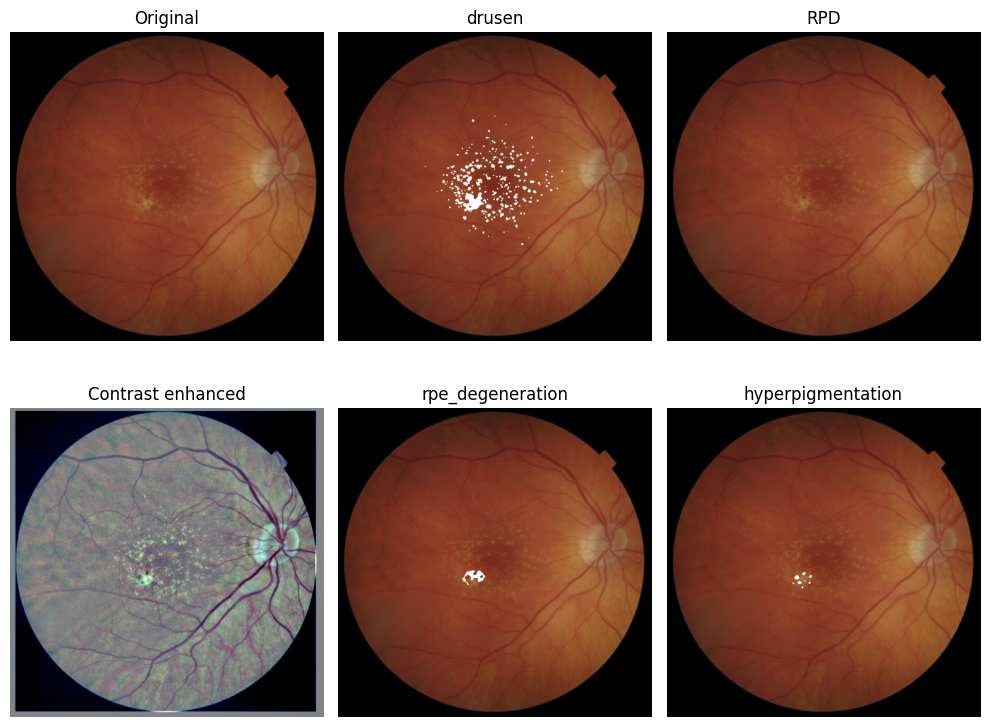

In [3]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
for ax_row in (*axes[0], *axes[1]):
    ax_row.axis('off')
axes[0, 0].imshow(bounds.image)
axes[0, 0].set_title('Original')
axes[1, 0].imshow(bounds.contrast_enhanced_5)
axes[1, 0].set_title('Contrast enhanced')

for ax, name in zip(axes[0][1:], ('drusen', 'RPD')):
    overlay = np.copy(bounds.image)
    overlay[result[name] > 0.5] = 255
    ax.set_title(name)
    ax.imshow(overlay)

for ax, name in zip(axes[1][1:], ('rpe_degeneration', 'hyperpigmentation')):
    overlay = np.copy(bounds.image)
    overlay[result[name] > 0.5] = 255
    ax.set_title(name)
    ax.imshow(overlay)
plt.tight_layout()

### Generate report

Field,drusen_area,drusen_count,RPD_area,RPD_count,hyperpigmentation_area,hyperpigmentation_count,rpe_degeneration_area,rpe_degeneration_count
CSF,0.10,15,0.00,0,0.00,0,0.00,0
SIM,0.19,32,0.00,0,0.00,0,0.00,0
NIM,0.21,33,0.00,0,0.00,0,0.00,0
TIM,0.43,37,0.00,0,0.03,3,0.08,1
IIM,0.47,36,0.00,0,0.05,8,0.13,8
SOM,0.08,22,0.00,0,0.00,0,0.00,0
NOM,0.19,38,0.00,0,0.00,0,0.00,0
TOM,0.08,26,0.00,0,0.00,0,0.00,0
IOM,0.09,17,0.00,0,0.00,0,0.00,0
center,0.10,15,0.00,0,0.00,0,0.00,0

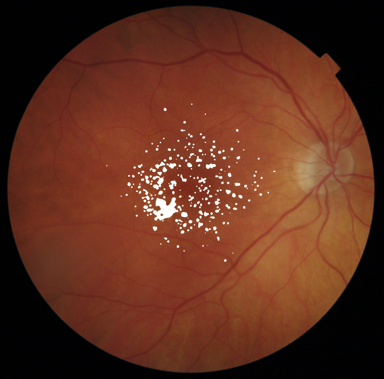
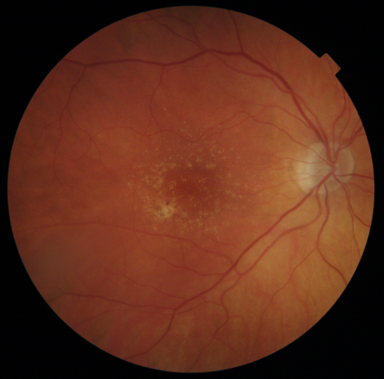
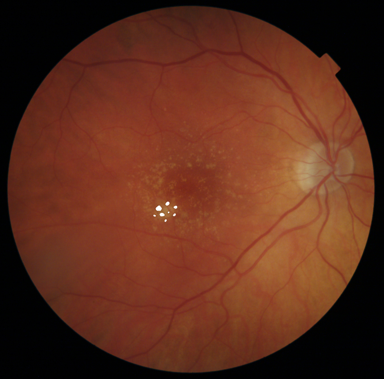
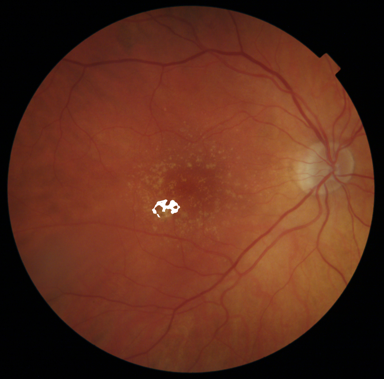
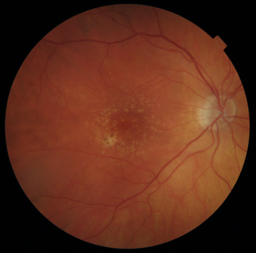

In [4]:
from cfi_amd.main import get_etdrs_masks, feature_names, Report
from IPython.display import HTML


# convert to binary mask
feature_images = {
    feature_name: result[feature_name] >= 0.5
    for feature_name in feature_names
}

etdrs_masks = get_etdrs_masks(bounds, coords)
report = Report(feature_images, etdrs_masks, etdrs_masks.all_fields)
HTML(report.generate_html_report(image, "image0"))

In [5]:
# parameters available in dict format
report.summaries

{'drusen': {'CSF_area': 0.10495670069880364,
  'CSF_count': 15,
  'SIM_area': 0.18654298666451363,
  'SIM_count': 32,
  'NIM_area': 0.21003950075767794,
  'NIM_count': 33,
  'TIM_area': 0.42861172488013644,
  'TIM_count': 37,
  'IIM_area': 0.46707202970168443,
  'IIM_count': 36,
  'SOM_area': 0.07940056372448541,
  'SOM_count': 22,
  'NOM_area': 0.18654298666451363,
  'NOM_count': 38,
  'TOM_area': 0.08066155732519191,
  'TOM_count': 26,
  'IOM_area': 0.08784922084921891,
  'IOM_count': 17,
  'center_area': 0.10495670069880364,
  'center_count': 15,
  'inner_area': 1.2922662420040125,
  'inner_count': 133,
  'outer_area': 0.4344543285634099,
  'outer_count': 102,
  'superior_grid_area': 0.2912054555231524,
  'superior_grid_count': 54,
  'nasal_grid_area': 0.40868802598897386,
  'nasal_grid_count': 71,
  'inferior_grid_area': 0.5750971481622073,
  'inferior_grid_count': 53,
  'temporal_grid_area': 0.5566866415918924,
  'temporal_grid_count': 56,
  'grid_area': 1.831677271266226,
  'grid